# Credit Card Fraud Detection 

# Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

This notebook show how build a credit card fraud detection  model. 

1:Clean Data 
> Exploring Data

> Detect missing value

2:Feature Engineering

> 2.1:Get more info about the distribution of Class

> 2.2: Creating 'Hour' Feature

> 2.3: Exploring patterns difference between Normal and Fraud Transanctions

> 2.4: Exploring feature distribution difference between Normal and Fraud transactions

> 2.5: Feature scaling with 'Hour' and 'Amount'

> 2.6: Exploring feature importance

3:Modeling

4:Evaluation

# 1:Clean Data

In [131]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

1.1 Exploring Data

In [132]:
data=pd.read_csv('creditcard.csv')
data.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Consideing of privacy protection, Features v1 to v28 are transformed with PCA, they became numerical variables,
that means we cannot use common sense to determine wether there are patterns exists in these feature. 

In [133]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

1.2 Detect missing value

In [135]:
#No missing value
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# 2.Feature Engineering

2.1:Get more info about the distribution of Class

In [136]:
print('Normal transactions:',round(data['Class'].value_counts()[0]/len(data['Class'])*100,2), 'of the dataset')
print('Fraud transactions:',round(data['Class'].value_counts()[1]/len(data['Class'])*100,2), 'of the dataset')

Normal transactions: 99.83 of the dataset
Fraud transactions: 0.17 of the dataset


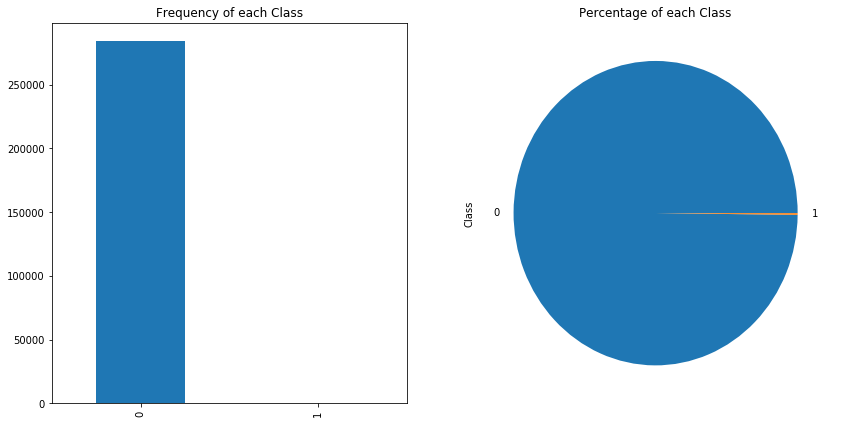

In [137]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
axs[0].set_title("Frequency of each Class")
data['Class'].value_counts().plot(kind='bar',ax=axs[0])

axs[1].set_title("Percentage of each Class")
data['Class'].value_counts().plot(kind='pie',ax=axs[1])
plt.show()

Distribution of features

(0.0, 172792.0)

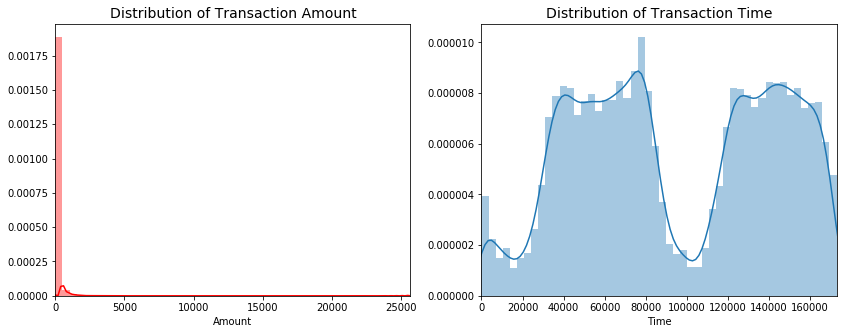

In [138]:
fig,ax= plt.subplots(1,2,figsize=(14,5))
sns.distplot(data['Amount'],ax=ax[0],color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(data['Amount']), max(data['Amount'])])

sns.distplot(data['Time'],ax=ax[1])
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(data['Time']), max(data['Time'])])

Visualization:

2.2: Creating 'Hour' Feature

In [139]:
data['Hour']=data["Time"].apply(lambda x : divmod(x, 3600)[0]) 

2.3:Exploring patterns difference between Normal and Fraud Transanctions

In [140]:
Xfraud = data.loc[data["Class"] == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = data.loc[data["Class"] == 0]

Difference 1: For the fraud transactions: the correlation between some of the variables is more pronounced. The variation between V1, V2, V3, V4, V5, V6, V7, V9, V10, V11, V12, V14, V16, V17 and V18 and V19  presents a certain pattern

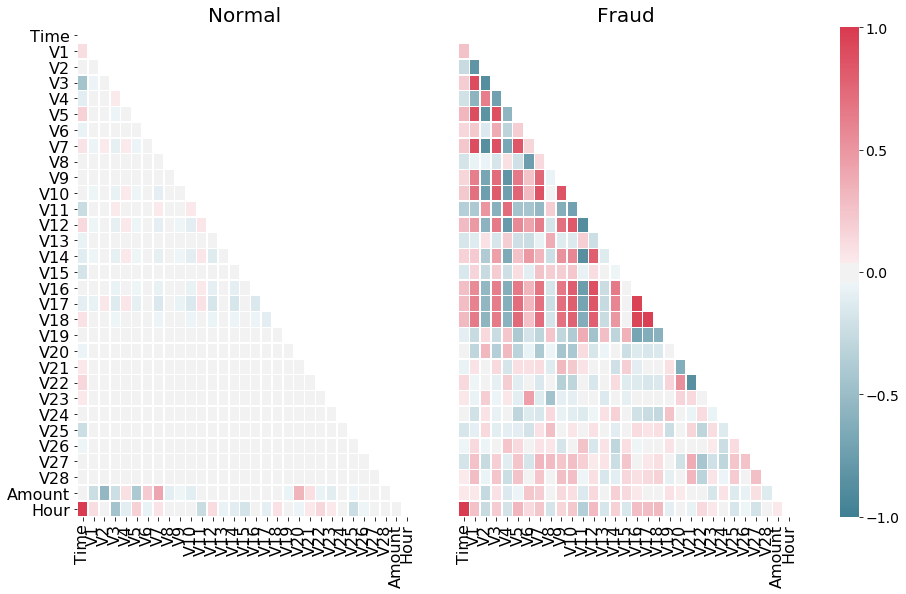

In [141]:
correlationNonFraud = XnonFraud.loc[:, data.columns != 'Class'].corr() # type : pandas.core.frame.DataFrame
mask = np.zeros_like(correlationNonFraud) # boolean array
indices = np.triu_indices_from(correlationNonFraud) #Return the indices for the upper-triangle of arr.
mask[indices] = True
grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True) #color map
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Normal', size = 20)


correlationFraud = Xfraud.loc[:, data.columns != 'Class'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
      ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
      cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraud', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

Difference 2: Fraud transactions tend to be Small Amount 

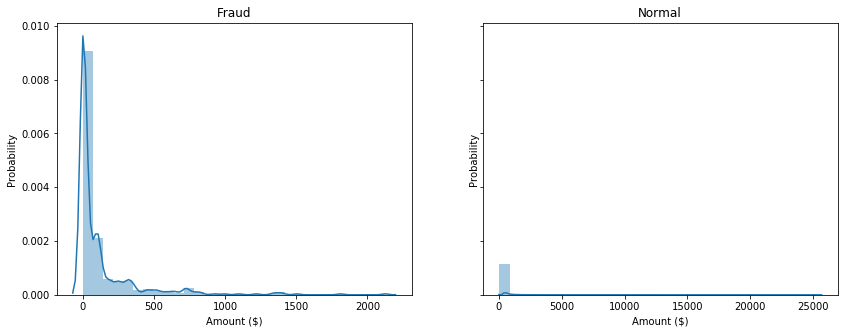

In [142]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True,figsize = (14, 5))

sns.distplot(data[data['Class']==1]['Amount'], ax=ax0, bins=30)
ax0.set(title="Fraud",xlabel='Amount ($)',ylabel='Probability')

sns.distplot(data[data['Class']==0]['Amount'], ax=ax1, bins=30)
ax1.set(title="Normal",xlabel='Amount ($)',ylabel='Probability')

plt.show()

The maximum  amount is 2125.87

In [143]:
np.max(data[data['Class']==1]['Amount'])

2125.87

In [144]:
np.min(data[data['Class']==1]['Amount'])

0.0

Difference 3: The most frequent fraud transactions were happended at 11:am on the first day. The rest of Fraud transactions were happened between 11pm-9am. Indicating that the credit theft don't want to attract the credit card owner's attention, so they prefer to choose the time when the owner sleep  and the time when consumption frequency is high. 

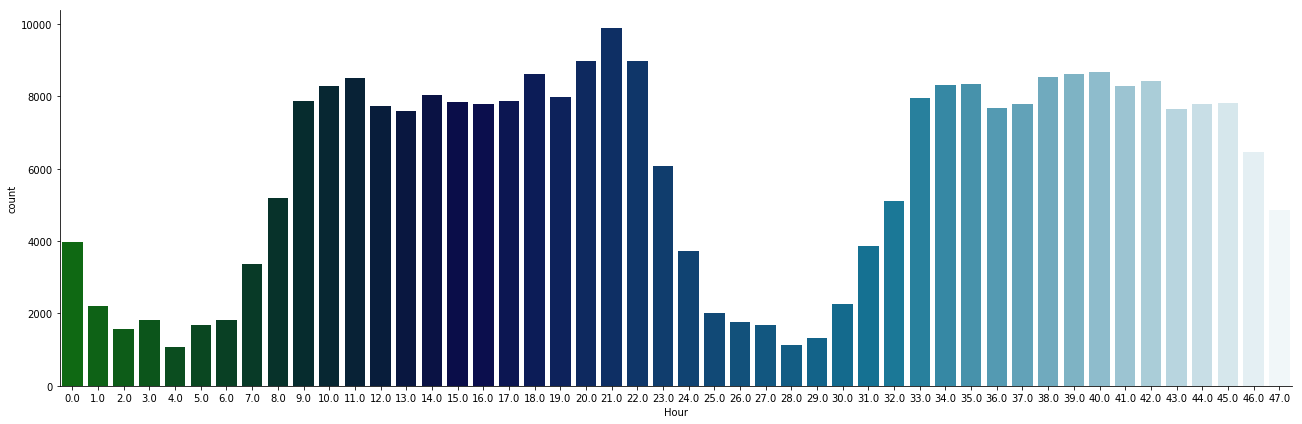

In [145]:
# High Consumption frequency: between 9:00 am to 11:00 pm
sns.factorplot(x='Hour',data=data,kind="count",  palette="ocean", size=6, aspect=3)

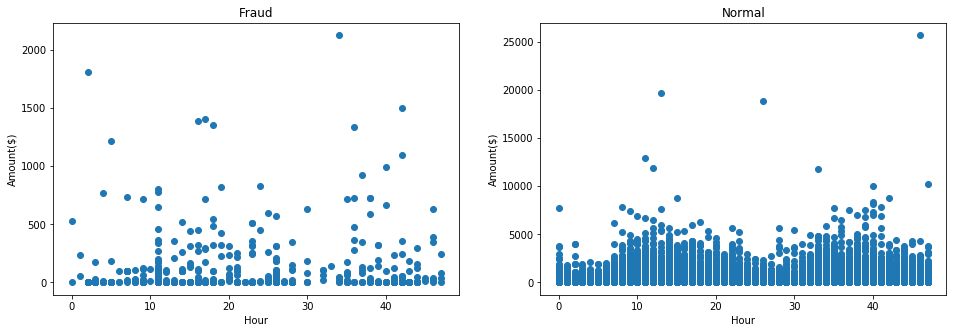

In [146]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize = (16, 5))
ax0.scatter(data[data['Class']==1]['Hour'],data[data['Class']==1]['Amount'])
ax0.set(title='Fraud',xlabel='Hour',ylabel='Amount($)')

ax1.scatter(data[data['Class']==0]['Hour'],data[data['Class']==0]['Amount'])
ax1.set(title='Normal',xlabel='Hour',ylabel='Amount($)')

plt.show()

In [147]:
#Fraud transaction Amount based on hour 
data[data['Class']==1]['Hour'].value_counts()

11.0    43
26.0    36
7.0     23
2.0     21
42.0    18
41.0    17
23.0    17
28.0    17
9.0     15
18.0    15
15.0    14
16.0    14
21.0    14
14.0    13
3.0     13
39.0    12
17.0    12
43.0    12
5.0     11
35.0    10
38.0    10
44.0    10
13.0     9
12.0     9
25.0     8
20.0     8
36.0     8
37.0     8
40.0     8
19.0     7
4.0      6
30.0     6
46.0     6
34.0     6
8.0      5
24.0     4
27.0     4
32.0     4
47.0     4
22.0     3
6.0      3
10.0     2
45.0     2
1.0      2
0.0      2
33.0     1
Name: Hour, dtype: int64

In [148]:
print ("Fraud Stats Summary")
print (data["Amount"][data["Class"] == 1].describe())

print ("Normal Stats Summary")
print (data["Amount"][data["Class"] == 0].describe())

Fraud Stats Summary
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
Normal Stats Summary
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


2.4: Exploring feature distribution difference between Normal and Fraud transactions

In [149]:
features_name=data.iloc[:,1:29].columns
features_name

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

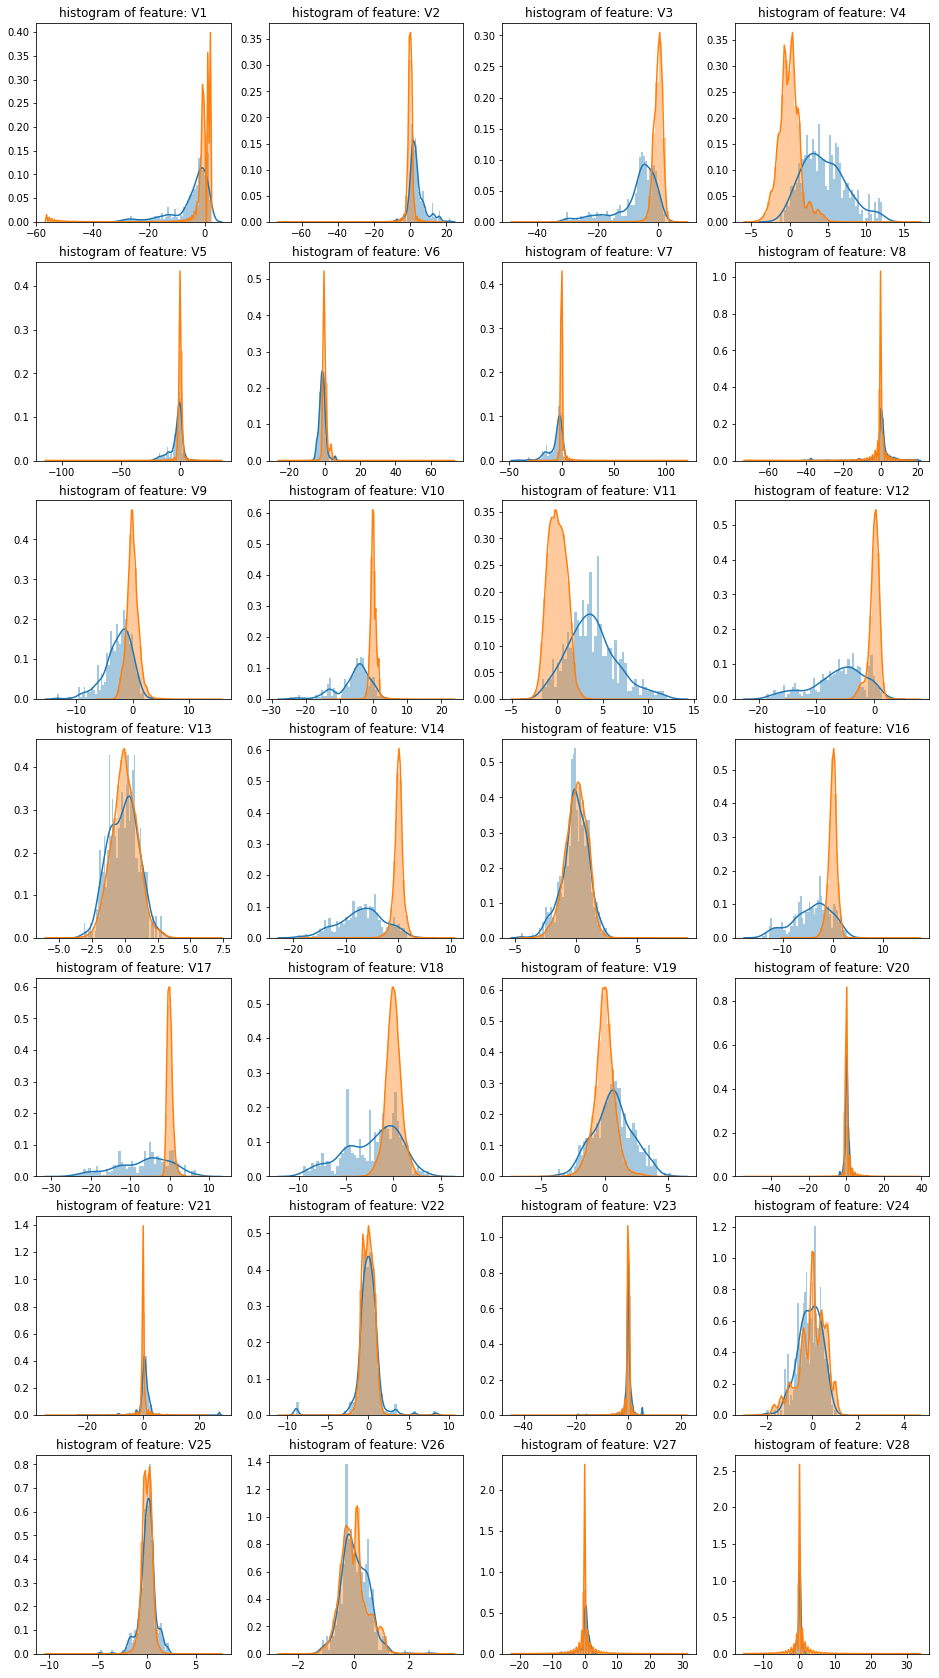

In [150]:
# define the figsize of the whole picture
plt.figure(figsize=(16,30)) 

# define the num of columns and rows
gs = gridspec.GridSpec(7, 4)

for i,f in enumerate(data[features_name]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[f][data["Class"] == 1], bins=50)
    sns.distplot(data[f][data["Class"] == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(f))

Figures above present the distribution of different variables between Normal and Fraud,we should choose those variables which has significant difference.  
We drop variables:'V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'

In [151]:
droplist = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Time']
data_new = data.drop(droplist, axis = 1)
data_new.shape # 查看数据的维度
data_new.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,149.62,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,2.69,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,378.66,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,123.50,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,69.99,0,0.0


In [152]:
# Feature scaling with 'Amount' and 'Hour' 
col = ['Amount','Hour']
from sklearn.preprocessing import StandardScaler # 导入模块
sc =StandardScaler() # 初始化缩放器
data_new[col] =sc.fit_transform(data_new[col])#对数据进行标准化
data_new.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.244964,0,-1.960264
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.342475,0,-1.960264
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,1.160686,0,-1.960264
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.140534,0,-1.960264
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.073403,0,-1.960264


2.6:Exploring feature importance

In [196]:
#导入库
from sklearn.ensemble import RandomForestClassifier
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [154]:
X_columns=data_new.drop(['Class'], axis=1).columns
X_value= data_new.drop(['Class'], axis=1)
y_value=data_new['Class']

In [155]:
rf=RandomForestClassifier()

#训练模型
rf.fit(X_value,y_value)

#预测特征重要度
rf_features =rf.feature_importances_

In [156]:
cols = X_columns.values
feature_dataframe = pd.DataFrame( {'features': cols,'Random Forest feature importances': rf_features})
feature_dataframe.sort_values(by='Random Forest feature importances',ascending=False)

,Random Forest feature importances,features
10,0.189975,V12
8,0.130258,V10
12,0.105301,V16
13,0.094820,V17
14,0.081465,V18
11,0.081289,V14
9,0.073896,V11
7,0.032005,V9
3,0.030152,V4
0,0.027057,V1


In [198]:
# Scatter plot
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Splitting the Data

Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, we want to test our models on the original testing set not on the testing set created by either of UnderSampling or Oversampling techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [158]:
print('No Frauds', round(data_new['Class'].value_counts()[0]/len(data_new) * 100,2), '% of the dataset')
print('Frauds', round(data_new['Class'].value_counts()[1]/len(data_new) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


# Split the whole dataset

In [185]:
from sklearn.model_selection import train_test_split

X = data_new.drop('Class',axis=1) 
y = data_new[ 'Class']
# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807


# Random undersampling

In [186]:
#Random undersampling
data_new = data_new.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = data_new.loc[data_new['Class'] == 1]
non_fraud_df = data_new.loc[data_new['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

X_undersample=new_df.drop(['Class'], axis=1)
y_undersample=new_df['Class']
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample,y_undersample
,test_size = 0.3,random_state = 42)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))


Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


In [187]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


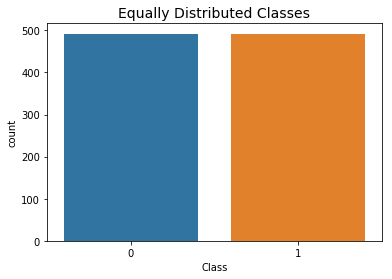

In [188]:
sns.countplot(new_df['Class'])
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# Modeling

In [210]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000,],'penalty': [ 'l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(),  param_grid, cv=10) # 确定模型LogisticRegression，和参数组合param_grid ，cv指定10折
grid_search.fit(X_train_undersample, y_train_undersample)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))
y_pred = grid_search.predict(X_test_undersample)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test_undersample, y_pred)))
labels = ['Non-fraud','fraud']
print(classification_report(y_test_undersample, y_pred,target_names=labels))
print(confusion_matrix(y_test_undersample,y_pred))
matrix2=confusion_matrix(y_test_undersample,y_pred)

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.94477
Test set accuracy score: 0.90541
             precision    recall  f1-score   support

  Non-fraud       0.84      0.97      0.90       134
      fraud       0.97      0.85      0.91       162

avg / total       0.91      0.91      0.91       296

[[130   4]
 [ 24 138]]


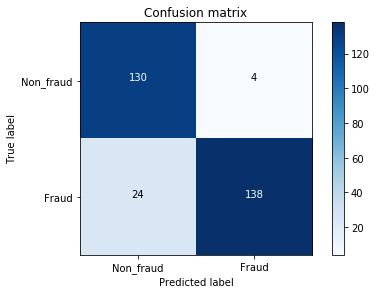

In [205]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['Non_fraud', 'Fraud']
plot_confusion_matrix(matrix2
                      , classes=labels
                      , title='Confusion matrix')
plt.show()

In [189]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [213]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000,],'penalty': [ 'l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(),  param_grid, cv=10) 
grid_search.fit(X_train_undersample, y_train_undersample)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))
y_pred = grid_search.predict(X_test)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))
labels = ['Non-fraud','fraud']
print(classification_report(y_test, y_pred,target_names=labels))
print(confusion_matrix(y_test,y_pred))
matrix3=confusion_matrix(y_test,y_pred)

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.94477
Test set accuracy score: 0.97793
             precision    recall  f1-score   support

  Non-fraud       1.00      0.98      0.99     85302
      fraud       0.06      0.91      0.12       141

avg / total       1.00      0.98      0.99     85443

[[83428  1874]
 [   12   129]]


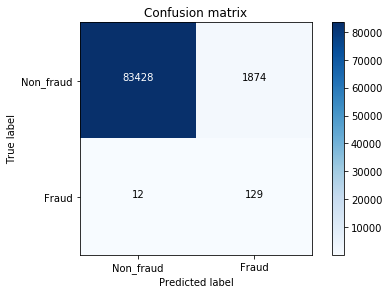

In [214]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['Non_fraud', 'Fraud']
plot_confusion_matrix(matrix3
                      , classes=labels
                      , title='Confusion matrix')
plt.show()

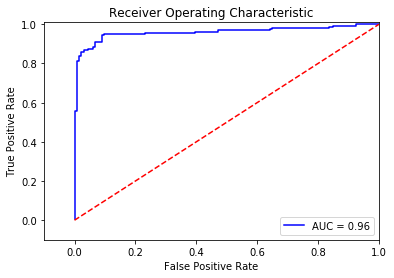

In [193]:
# ROC CURVE
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
lr = LogisticRegression(C =0.1, penalty = 'l1')
y_pred_undersample_score = lr.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [209]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000,],'penalty': [ 'l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(),  param_grid, cv=10) # 确定模型LogisticRegression，和参数组合param_grid ，cv指定10折
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))
y_pred = grid_search.predict(X_test)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))
labels = ['Non-fraud','fraud']
print(classification_report(y_test, y_pred,target_names=labels))
print(confusion_matrix(y_test,y_pred))
matrix1=confusion_matrix(y_test,y_pred)

Best parameters: {'C': 0.1, 'penalty': 'l1'}
Best cross-validation score: 0.99914
Test set accuracy score: 0.99923
             precision    recall  f1-score   support

  Non-fraud       1.00      1.00      1.00     85302
      fraud       0.89      0.61      0.72       141

avg / total       1.00      1.00      1.00     85443

[[85291    11]
 [   55    86]]


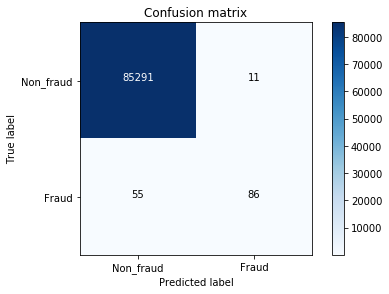

In [199]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['Non_fraud', 'Fraud']
plot_confusion_matrix(matrix1
                      , classes=labels
                      , title='Confusion matrix')
plt.show()

# 3 Learning Curves:

In [67]:
Counter(y_test)

Counter({0: 106, 1: 91})

In [35]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [36]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 92.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score


In [37]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [110]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Jane\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

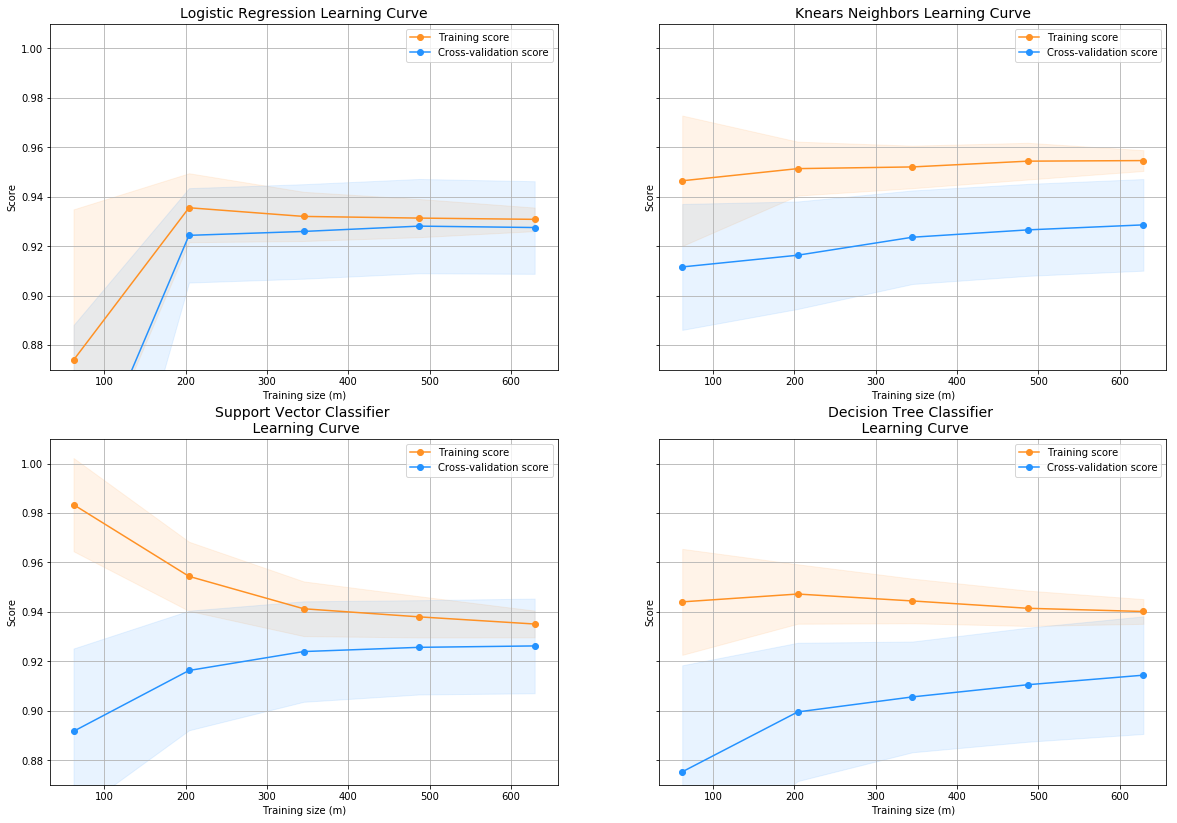

In [111]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [116]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [118]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9719289858255915
KNears Neighbors:  0.9308399984494722
Support Vector Classifier:  0.967684415903247
Decision Tree Classifier:  0.9092069050172497


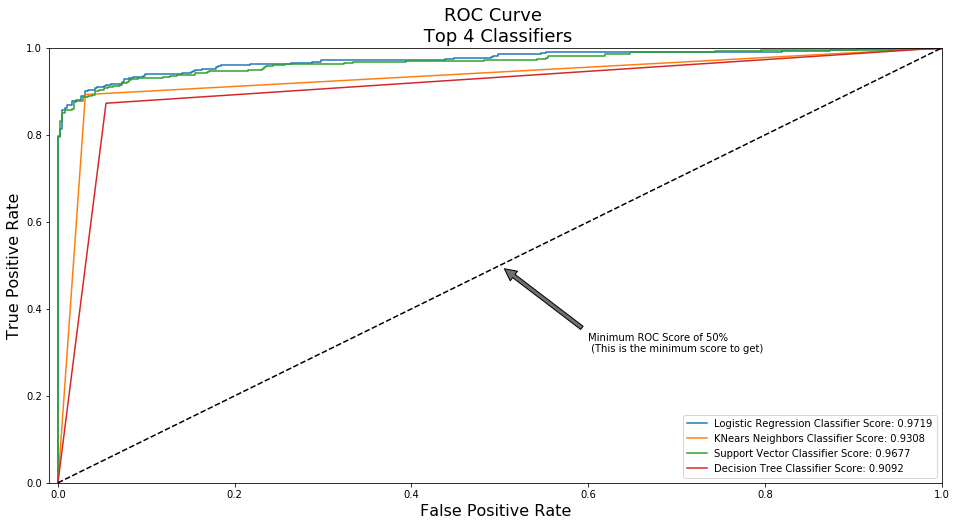

In [119]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [93]:
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
# We will undersample during cross validating
undersample_X =data_new.drop(['Class'], axis=1)
undersample_y = data_new['Class']


for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []


# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

Train: [265497 180256  42625 ...  29025  13738  17630] Test: [263001  11353 147245 ... 274516 269800  64124]
Train: [ 72179 114236  16775 ... 264450 191872 284013] Test: [202599  32939 128073 ... 244011 127618  48262]
Train: [ 20850 114576 167612 ... 244488 178920 218484] Test: [284351  82424  90925 ... 171166 168740 271586]
Train: [122204 181614 194359 ... 104584 277573  29395] Test: [225650  63302  67981 ... 279446  77500  75991]
Train: [241673 223444 136891 ...  86436 160472  49578] Test: [157470 204821  83700 ... 251463 178915 216826]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


Counter({0: 284315, 1: 492})

In [109]:
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    print('train:',train , 'test:',test)
    undersample_pipeline = imbalanced_make_pipeline(NearMiss('majority'), log_reg)
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(undersample_accuracy)))
print("precision: {}".format(np.mean(undersample_precision)))
print("recall: {}".format(np.mean(undersample_recall)))
print("f1: {}".format(np.mean(undersample_f1)))
print('---' * 45)

train: [225122  62002 197458 ... 195673 152135 100500] test: [197837 111296  39994 ... 161456 162212  66535]
train: [ 94889 216396  49750 ... 212572  15631  28210] test: [218595 111721 194747 ...   2921 166466  55971]
train: [ 32319 180287 157061 ... 137787 192058 183003] test: [ 74393  81657 166182 ... 119474  81624 204479]
train: [ 43137 115037 219151 ... 219252 193641 214214] test: [112250 227311  70298 ...  18808  45843 188761]
train: [169061  18025 143044 ...  18163  91176 146423] test: [223115 114686 210215 ...  40529 224979 204915]
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: nan
precision: 0.003336628722342888
recall: 0.9544303797468355
f1: 0.006650009222182025
---------------------------------------------------------------------------------------------------------------------------------------


C:\Users\Jane\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning:

Mean of empty slice.

C:\Users\Jane\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars



In [120]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.96
Precision Score: 0.65
F1 Score: 0.78
Accuracy Score: 0.72
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: nan
Precision Score: 0.00
Recall Score: 0.95
F1 Score: 0.01
---------------------------------------------------------------------------------------------------------------------------------------


C:\Users\Jane\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning:

Mean of empty slice.

C:\Users\Jane\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars



In [122]:

# Fit the classifier to the training data
log_reg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
original_y_pred = log_reg.predict(original_Xtest)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(original_ytest, original_y_pred))
print(classification_report(original_ytest, original_y_pred))

[[55217  1647]
 [   10    88]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     56864
          1       0.05      0.90      0.10        98

avg / total       1.00      0.97      0.98     56962



In [125]:
# Fit the classifier to the training data
log_reg.fit(original_Xtrain, original_ytrain)

# Predict the labels of the test set: y_pred
original_y_pred = log_reg.predict(original_Xtest)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(original_ytest, original_y_pred))
print(classification_report(original_ytest, original_y_pred))

[[56851    13]
 [   47    51]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.80      0.52      0.63        98

avg / total       1.00      1.00      1.00     56962



AUC computation

In [85]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X_train, y_train, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.9742594456065433
AUC scores computed using 5-fold cross-validation: [0.96166831 0.9782786  0.95870781 0.97221428 0.99173022]


In [62]:
>>> from sklearn.model_selection import learning_curve
>>> from sklearn.svm import SVC
>>> np.random.seed(0)
>>> iris = load_iris()
>>> X, y = iris.data, iris.target
>>> train_sizes, train_scores, valid_scores = learning_curve(
...     SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)
>>> train_sizes            
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.98181818, 0.99090909, 0.97272727, 1.        , 0.98181818]])